<a href="https://colab.research.google.com/github/elikapati/DeepLearning/blob/master/ClassifyClothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic classification: Classify images of clothing

In [0]:
# Install TensorFlow 2
!pip install -q tensorflow-gpu==2.0.0-rc0

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

## Import the Fashion MNIST dataset
This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

## Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255

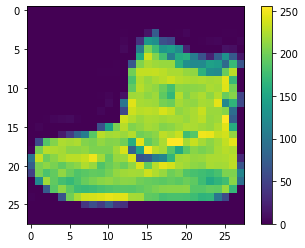

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

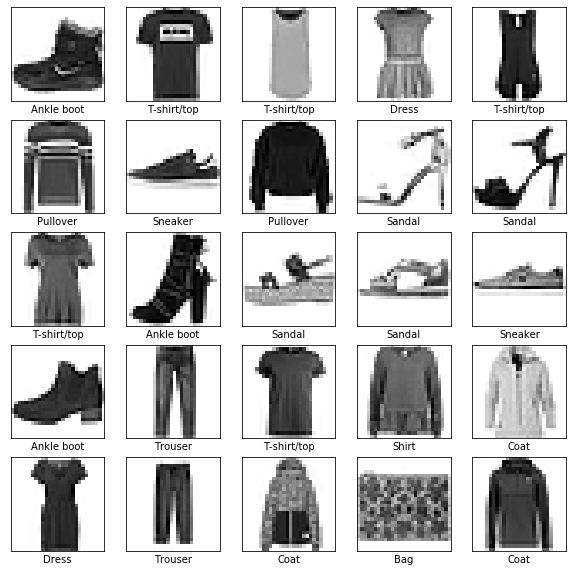

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the Model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

In [0]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.4993 - accuracy: 0.8242
Epoch 2/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3726 - accuracy: 0.8663
Epoch 3/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3360 - accuracy: 0.8773
Epoch 4/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3114 - accuracy: 0.8849
Epoch 5/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2948 - accuracy: 0.8918
Epoch 6/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2798 - accuracy: 0.8959
Epoch 7/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2679 - accuracy: 0.9007
Epoch 8/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2562 - accuracy: 0.9035
Epoch 9/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2446 - accuracy: 0.9079
Epoch 

## Evaluate Accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2654 - accuracy: 0.8767

Test accuracy: 0.8767


## Make Predictions

In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[0]

array([6.1246919e-09, 6.1971768e-11, 2.0817961e-12, 2.1730074e-12,
       1.8034452e-09, 2.6249303e-04, 2.4437664e-11, 1.9352474e-03,
       1.6506463e-10, 9.9780220e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

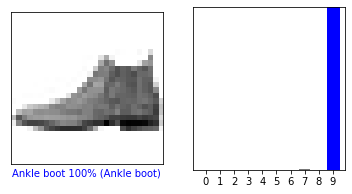

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

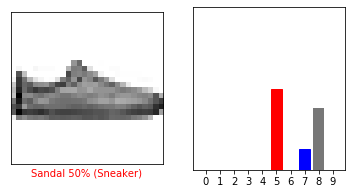

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

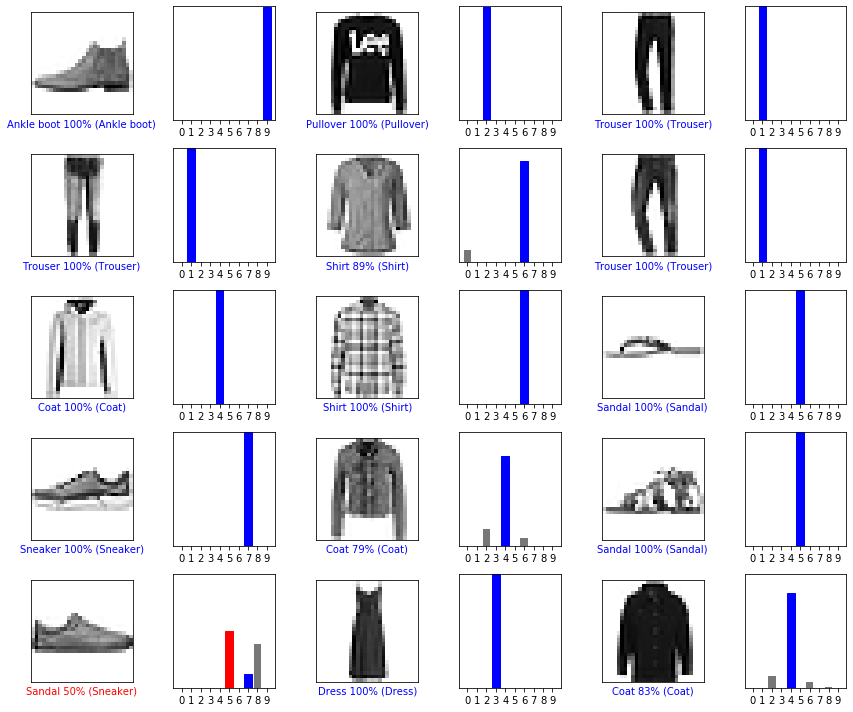

In [0]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [0]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [0]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.1504660e-04 2.2751527e-17 9.9619257e-01 1.2699627e-10 3.0143433e-03
  4.0733573e-17 6.7797344e-04 2.1107173e-16 1.1944519e-10 6.7974753e-12]]


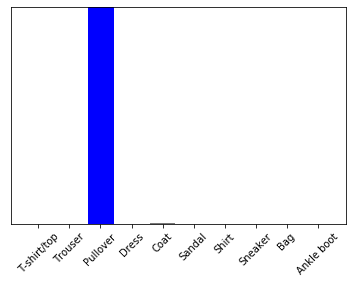

In [0]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [0]:
np.argmax(predictions_single[0])

2